# Probabilidad

# Introducción

La probabilidad es el cálculo matemático que evalúa las posibilidades que existen de que una cosa suceda cuando interviene el azar.

## Ley de los grandes números

Si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son independientes la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá con probabilidad 1 a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento

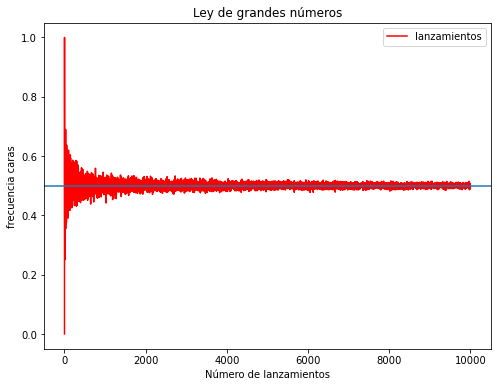

In [71]:
import pandas as pd
import numpy as np

resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

### Probabilidad eventos dependientes y independientes

In [9]:
import enum, random 
# Una enumeración(enum) es un conjunto escrito de valores enumerados

In [21]:
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

# Función para elegir entre si es niño o niña
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [6]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

In [7]:
for _ in range(10000):
    younger = random_kid()
    older = random_kid()    
    if older == Kid.GIRL:        
        older_girl += 1    
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1    
    if older == Kid.GIRL or younger == Kid.GIRL:        
        either_girl += 1

In [72]:
print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


### Teorema del límite central

Este teorema establece que la suma o el promedio de casi cualquier conjunto de variables independientes generadas al azar se aproximan a la Distribución Normal. El Teorema del límite central explica por qué la Distribución Normal surge tan comúnmente y por qué es generalmente una aproximación excelente para la media de casi cualquier colección de datos. Este notable hallazgo se mantiene verdadero sin importar la forma que adopte la distribución de datos que tomemos.

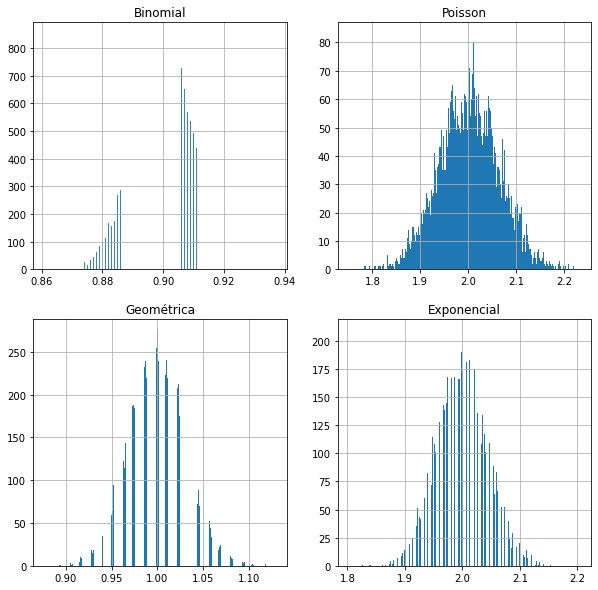

In [74]:
# Ejemplo teorema del límite central
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []
mu = .9
lam = 1.0
size=1000

for i in range(1,20000):
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_possion.append(muestra.mean()) 

df = pd.DataFrame({ 'binomial' : muestra_binomial, 
                     'poission' : muestra_possion,
                     'geometrica' : muestra_geometric,
                    'exponencial' : muestra_exp})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.exponencial.hist(ax=axes[0,1],bins=1000)
df.poission.hist(ax=axes[1,0],bins=1000)
df.geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geométrica')
axes[1,1].set_title('Exponencial')
plt.show()

# Distribuciones

## Distribuciones Continuas

**Son aquellas que presentan un número infinito de posibles soluciones**

Un lanzamiento de moneda corresponde a una distribución discreta, una que asocia probabilidad positiva con resultados discretos. A menudo, querremos modelar distribuciones a través de un continuo de resultados. (Para nuestros propósitos, estos resultados siempre serán números reales, aunque ese no es siempre el caso en la vida real). Por ejemplo, la distribución uniforme otorga el mismo peso a todos los números entre 0 y 1.

Debido a que hay infinitos números entre 0 y 1, esto significa que el peso que asigna a los puntos individuales debe ser necesariamente cero. Por esta razón, representamos una distribución continua con una función de densidad de probabilidad (PDF) tal que la probabilidad de ver un valor en un cierto intervalo es igual a la integral de la función de densidad en el intervalo.

In [52]:
# La función de densidad para la distribución uniforme es:

def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

La probabilidad de que una variable aleatoria que sigue a esa distribución esté entre 0,2 y 0,3 es 1/10, como cabría esperar. Random.random de Python es una variable (pseudo) aleatoria con una densidad uniforme.

In [53]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

Si graficamos una función uniforme tenemos

![title](img/ucd.png)

La importancia de las distribuciones de probabilidad recae en la forma de visualización que otorga cada una de las funciones y las variables que se ven reflejadas en esta, la distribución uniforme (uniform_cdf) nos da contexto de:

### Distribución Normal

Una de las principales distribuciones, ya que es la que con más frecuencia aparece aproximada en los fenómenos reales. Tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico.

In [55]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

<img src='img/dn_img.png' width=500px>

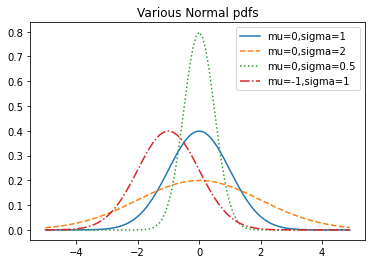

In [57]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

![image](https://pbs.twimg.com/media/CR6KbxtUkAArvkN.png)

Cuando μ = 0 y σ = 1, se denomina distribución normal estándar. Si Z es una variable aleatoria normal estándar, resulta que:

![title](img/normal_cdf.png)

también es normal pero con media μ y desviación estándar σ. Por el contrario, si X es una variable aleatoria normal con media μ y desviación estándar σ, es una variable normal estándar.

![title](img/normal_cdf1.png)

In [61]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

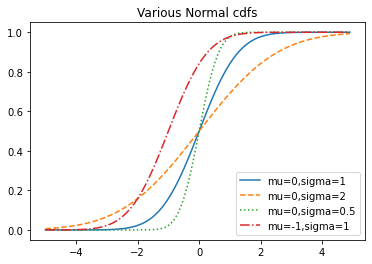

In [62]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Necesitaremos invertir normal_cdf para encontrar el valor correspondiente a una probabilidad especificada. No hay una forma sencilla de calcular su inverso, pero normal_cdf es continuo y estrictamente creciente, por lo que podemos usar una búsqueda binaria:

La función biseca intervalos repetidamente hasta que se estrecha en una Z que está lo suficientemente cerca de la probabilidad deseada.

In [18]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the CDF's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

## Distribuciones Discretas

### Distribución Binomial

Es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de **n** ensayos de Bernoulli independientes entre sí con una probabilidad fija **p** de ocurrencia de éxito entre los ensayo

In [64]:
def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

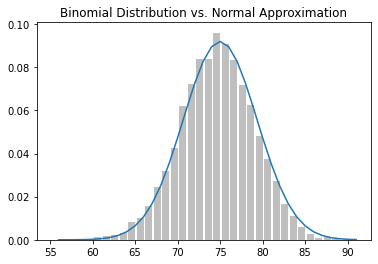

In [65]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
binomial_histogram(0.75, 100, 10000)

### Distribución de Bernoulli

La distribución de Bernoulli es una distribución discreta que está relacionada con muchas distribuciones, tales como la distribución binomial, geométrica y binomial negativa. La distribución de Bernoulli representa el resultado de 1 ensayo. Las secuencias de ensayos de Bernoulli independientes generan las demás distribuciones: la distribución binomial modela el número de éxitos en n ensayos, la distribución geométrica modela el número de fallas antes del primer éxito y la distribución binomial negativa modela el número de fallas antes del éxito xésimo.

In [66]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

![title](img/bernoulli.png)